# Calculate food eaten by a change of the mean gray value in images

This notebook explores if the amount of food eaten by worms can be extracted from the mean gray value of images.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Load the data from the CSV file
df = pd.read_csv('mean_gray_2024-06.csv')

# Extract the mean_gray_values
mean_gray_values = df['mean_gray_value'].values

In [7]:
# Filter out outliers caused by shifts in light conditions

# Calculate Q1, Q3 and IQR
Q1 = np.percentile(mean_gray_values, 25)
Q3 = np.percentile(mean_gray_values, 75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 0.2 * IQR
upper_bound = Q3 + 0.2 * IQR

# Remove outliers
filtered_gray_values = [x for x in mean_gray_values if lower_bound <= x <= upper_bound]

## Plot the gray values over time

The shift around the 90th image is caused because of the light intensity being manually changed from 0.1 to 0.2. However, individual outliers (image with a sudden shift in light conditions) are removed via IQR.

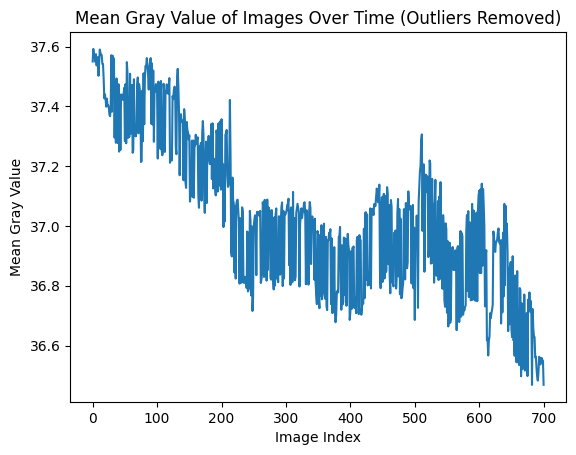

In [8]:
# Plot the filtered gray values
plt.plot(filtered_gray_values)
plt.title('Mean Gray Value of Images Over Time (Outliers Removed)')
plt.xlabel('Image Index')
plt.ylabel('Mean Gray Value')
plt.show()